<a href="https://colab.research.google.com/github/smit977/Linear_Regression-Problem-solving-and-Prediction-/blob/master/breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data= pd.read_csv(r"/content/drive/My Drive/Colab/BreastCancer.csv")
pd.set_option('display.max_columns', None,'display.max_rows',None)


In [3]:
data.columns


Index(['Unnamed: 0', 'Id', 'Cl_thickness', 'Cell_size', 'Cell_shape',
       'Marg_adhesion', 'Epith_c_size', 'Bare_nuclei', 'Bl_cromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [4]:
data.drop(['Unnamed: 0','Id'],axis=1)

,Cl_thickness,Cell_size,Cell_shape,Marg_adhesion,Epith_c_size,Bare_nuclei,Bl_cromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
5,8,10,10,8,7,10.0,9,7,1,malignant
6,1,1,1,1,2,10.0,3,1,1,benign
7,2,1,2,1,2,1.0,3,1,1,benign
8,2,1,1,1,2,1.0,1,1,5,benign
9,4,2,1,1,2,1.0,2,1,1,benign


In [5]:
data.isnull().sum()

Unnamed: 0          0
Id                  0
Cl_thickness        0
Cell_size           0
Cell_shape          0
Marg_adhesion       0
Epith_c_size        0
Bare_nuclei        16
Bl_cromatin         0
Normal_nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [6]:
data['Bare_nuclei']=data['Bare_nuclei'].fillna(1)

In [7]:
data.shape

(699, 12)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
data['Class']=le.fit_transform(data['Class'])


In [10]:
# Data Sampling
from sklearn.model_selection import train_test_split

In [11]:
data_x = data.iloc[: , 0:11] 
data_y = data.iloc[: , 11]

In [12]:
data_x_train , data_x_test , data_y_train , data_y_test = train_test_split(data_x , data_y , test_size = .2)

In [13]:
from sklearn.ensemble import RandomForestClassifier 
reg_data = RandomForestClassifier(n_estimators= 250) 


In [14]:
reg_data.fit(data_x_train, data_y_train) # train model

# pred_train = reg_data.predict(data_x_train)
pred_test = reg_data.predict(data_x_test)
pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0])

In [15]:
 import collections
 val=collections.Counter(pred_test)
benign=val[0]
malignant=val[1]

<BarContainer object of 2 artists>

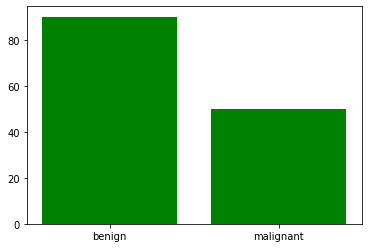

In [16]:
import matplotlib.pyplot as plt
plt.bar(['benign','malignant'],[val[0],val[1]],color='g')

In [17]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(data_y_test,pred_test)
con

array([[89,  2],
       [ 1, 48]])